In [1]:
import pandas as pd

In [2]:
from dateutil.relativedelta import relativedelta

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Collect the data to train the model

In [7]:
today = datetime.today().strftime("%Y-%m-%d")
previous_date = (datetime.today() - relativedelta(years=2)).strftime("%Y-%m-%d")

In [8]:
data = yf.download("btc-usd", start=previous_date, end=today)

[*********************100%***********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-09,6775.080078,6838.680176,6724.339844,6741.750000,6741.750000,3718129920
2018-07-10,6739.209961,6767.740234,6320.720215,6329.950195,6329.950195,4052430080
2018-07-11,6330.770020,6444.959961,6330.470215,6394.709961,6394.709961,3644859904
2018-07-12,6396.779785,6397.100098,6136.419922,6228.810059,6228.810059,3770170112
2018-07-13,6235.029785,6310.549805,6192.240234,6238.049805,6238.049805,3805400064
...,...,...,...,...,...,...
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
2020-07-06,9072.849609,9375.474609,9058.664062,9375.474609,9375.474609,17889263251
2020-07-07,9349.161133,9360.617188,9201.815430,9252.277344,9252.277344,13839652594


In [10]:
from sklearn.preprocessing import MinMaxScaler


In [11]:
import numpy as np

# Period of time of previous prices to predict the next one.

In [12]:
period = 20

In [15]:
training_set = data[0:-period]
test_set  = data[len(data)-period:]

In [16]:
training_set=training_set.iloc[:,0:1].values

# Scale the values to be in range of (0,1)
### Numerical stability results in better models for LSTM

In [17]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
X_train = []
y_train = []

In [19]:
# Every X_train contains <period> values for each y_train
for i in range(period, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-period: i, 0])
    y_train.append(training_set_scaled[i, 0]) 

In [20]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [28]:
#X_train

In [29]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
692/692 [==============================] - 3s 5ms/step - loss: 0.0587
Epoch 2/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0150
Epoch 3/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0116
Epoch 4/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 5/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 6/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 7/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0096
Epoch 8/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0089
Epoch 9/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0104
Epoch 10/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0084
Epoch 11/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0082
Epoch 12/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0074
Epoch 13/100


692/692 [==============================] - 2s 3ms/step - loss: 0.0021
Epoch 100/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0025


In [30]:
inputs = data

In [31]:
inputs = inputs.iloc[:,0:1].values

In [32]:
inputs = sc.fit_transform(inputs)

In [33]:
X_test = []
y_test = []
for i in range(period, len(inputs)): 
    X_test.append(inputs[i-period: i, 0])
    y_test.append(inputs[i, 0]) 
    #print(len(X_test))


In [34]:
X_test,y_test = np.array(X_test), np.array(y_test)

In [35]:
#len(X_test)

In [36]:
X_test = np.reshape(X_test, newshape = (X_test.shape[0], X_test.shape[1], 1))

In [37]:
predicted_price = model.predict(X_test)

In [38]:
predicted_price = sc.inverse_transform(predicted_price)

In [39]:
real_price = data['Open'].values

In [40]:
real_price = real_price[20:]

In [41]:
import matplotlib.pyplot as plt

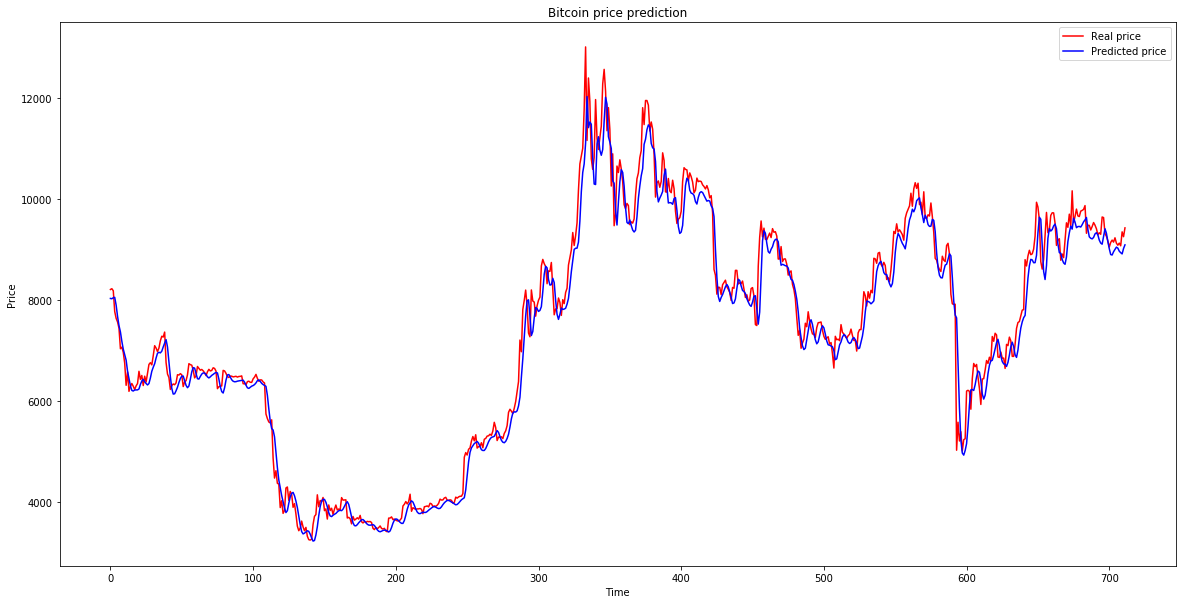

In [42]:
plt.subplots(figsize=(20, 10))
plt.plot(real_price, color = 'red', label = 'Real price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted price')
plt.title('Bitcoin price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.show()

In [43]:
#real_price

In [45]:
loss  = model.evaluate(X_test, y_test,  batch_size=32)
print('Loss:', loss)


712/712 [==============================] - 0s 672us/step
Loss: 0.0014285336397692897


In [ ]:
#X_test[-1]

In [ ]:
#sc.inverse_transform(model.predict(np.array([X_test[-1]])))